In [219]:
%run ./DataGen2.ipynb

plt.rcParams.update({'font.size': 14})

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [134]:
ID = 6

In [135]:
folders = {1: 'standard',
          2: 'low_density',
          3: 'high_noise',
          4: 'different_densities',
          5: 'different_sizes',
          6: 'non_uniform_noise'}

NumberOfSimulations = 30
general_path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Deviations_from_standard/'
figures_saving_path = general_path + 'Results/Figures/'

In [136]:
def read_GT():
    path = general_path + 'Data/' + folders[ID] + '/'
    truelabels = []
    for i in range(NumberOfSimulations):
        truelab = pd.read_csv(path + 'simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv',
                       usecols = ['labels_1'])['labels_1'].to_numpy()
        truelabels.append(truelab)
    return truelabels

def read_graphic():
    path = general_path + 'Graphic_analysis/'
    graphic_labels = []
    for i in range(NumberOfSimulations):
        graphic_lab = pd.read_csv(path + 'graphic_result_' + str(ID)+ '_'+ str(i) +'.csv',
                    usecols = ['graphic_label'])['graphic_label'].to_numpy()
        graphic_labels.append(graphic_lab)
    return graphic_labels

def read_tomato():
    path = general_path + 'Tomato_analysis/'
    tomato_labels = []
    for i in range(NumberOfSimulations):
        tomato_lab = pd.read_csv(path + 'tomato_result_' + str(ID)+ '_'+ str(i) +'.csv',
                    usecols = ['x'])['x'].to_numpy()
        tomato_labels.append(tomato_lab)
    return tomato_labels

def read_voronoi():
    path = general_path + 'SRT_analysis/'
    voronoi_labels = []
    for i in range(NumberOfSimulations):
        voronoi_lab = pd.read_csv(path + 'voronoi_result_' + str(ID)+ '_'+ str(i) +'.csv',
                    usecols = ['x'])['x'].to_numpy()
        voronoi_labels.append(voronoi_lab)
    return voronoi_labels

In [137]:
voronoi_labels = read_voronoi()
tomato_labels = read_tomato()
graphic_labels = read_graphic()
truelabels = read_GT()

In [142]:
def compute_FMIs(GT, res):
    FMIs = []
    for i in range(NumberOfSimulations):
        FMI = metrics.fowlkes_mallows_score(GT[i], res[i])
        FMIs.append(FMI)
    return FMIs

def compute_and_plot_all_FMIs(title = ''):
    global ID, truelabels, graphic_labels, tomato_labels, voronoi_labels, figures_saving_path
    
    FMI_graphic = compute_FMIs(truelabels, graphic_labels)
    FMI_voronoi = compute_FMIs(truelabels, voronoi_labels)
    FMI_tomato = compute_FMIs(truelabels, tomato_labels)
    
    plt.figure(figsize = (5,5))
    plt.boxplot([FMI_graphic, FMI_tomato, FMI_voronoi], labels = ['GrapHiC', 'ToMATo', 'Voronoi'],
                medianprops=dict(linewidth=1))
    plt.grid()
    plt.ylabel('FMI')
    plt.title(title)
    plt.savefig(figures_saving_path + 'FMI_' + str(ID) + '.pdf')


                                
#notch=True, patch_artist=True,
#boxprops=dict(facecolor=c, color=c),
#capprops=dict(color=c),
#whiskerprops=dict(color=c),
#flierprops=dict(color=c, markeredgecolor=c),
#medianprops=dict(color='DarkOrange'))
    

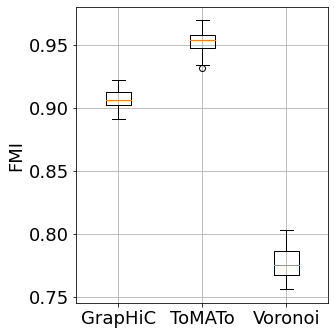

In [143]:
compute_and_plot_all_FMIs()

In [282]:
def histo_NumberOfClusters(list_of_labels,  method_str, GT = 40):
    global ID, figures_saving_path
    N_clusters = []
    for labels in list_of_labels:
        NumberOfClusters = len(np.unique(labels))-1
        N_clusters.append(NumberOfClusters)
    plt.figure(figsize = (4,4))
    #plt.axvspan(18, 24, color='DarkOrange', alpha = 0.2, label = 'domaine ok selon GT')
    #plt.hist(N_clusters, bins = np.unique(N_clusters), color = 'tab:purple')
    unique, counts = np.unique(N_clusters, return_counts = True)
    plt.bar(unique, counts, align = 'center', color = 'tab:purple')
    plt.grid()
    plt.axvline(x=GT, label='GT = ' + str(GT), c='DarkOrange', linewidth=2, linestyle = '--')
    plt.legend()
    plt.xlabel('#clusters detected')
    plt.ylabel('#images')
    plt.xlim(25, 55)
    ymax = max(counts) * 1.5
    plt.ylim(0, ymax)
    plt.savefig(figures_saving_path + 'NumberOfClusters_'+ method_str + str(ID) +  '.pdf')
        

def histo_LocPerCluster(list_of_labels, method_str, GT = 24):
    global ID, figures_saving_path
    plt.figure(figsize = (6,6))
    plt.axvspan(18, 24, color='tab:pink', alpha = 0.2, label = 'GT = 18 to 24')
    #plt.axvline(x=18, c='tab:blue', linewidth=0.5, linestyle = '--')
    #plt.axvline(x=24, c='tab:blue', linewidth=0.5, linestyle = '--')
    for labels in list_of_labels:
        unique, counts = np.unique(labels, return_counts = True)
        counts_without_noise = counts[np.where(unique != 0)]
        unique_for_bar, counts_for_bar = np.unique(counts_without_noise, return_counts = True)
        plt.bar(unique_for_bar, counts_for_bar, align = 'center', color = 'tab:olive')
    
    plt.grid()
    #plt.axvline(x=GT, label='GT = ' + str(GT), c='tab:pink', linewidth=2, linestyle = '--')
    plt.legend()
    plt.xlabel('#points attr. to the cluster')
    plt.ylabel('#clusters')
    plt.ylim(0, 25)
    #plt.xticks([15, 18, 21, 24])
    #plt.yticks([0, 20, 40, 60])
    plt.savefig(figures_saving_path + 'LocPerCluster_'+ method_str + str(ID) +  '.pdf')

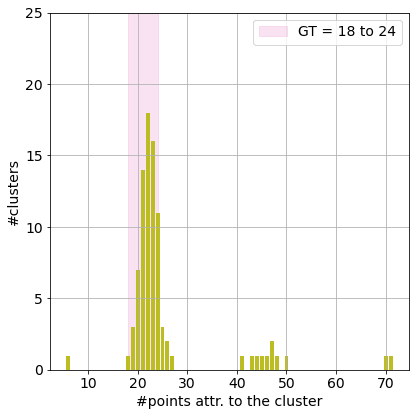

In [283]:
histo_LocPerCluster(graphic_labels, 'graphic')

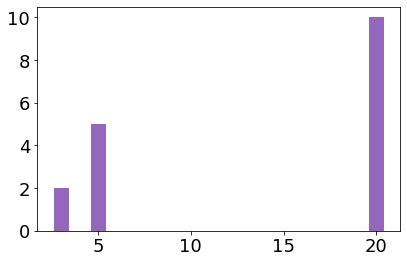

In [200]:
counts1 = [5,3,20]
counts2 = [5, 20, 7]
unique1 = [5,2,10]
unique2 = [3,6,1]

plt.bar(counts1, unique1, align = 'center', color = 'tab:purple')
#plt.bar(counts2, unique2, align = 'center', color = 'tab:purple')

plt.show()

In [ ]:
unique, counts = np.unique(labels_clean, return_counts = True)
counts_without_noise = counts[np.where(unique != 0)]

In [ ]:
plt.figure(figsize = (5,5))
#plt.axvspan(18, 24, color='DarkOrange', alpha = 0.2, label = 'domaine ok selon GT')
plt.hist(counts_without_noise, bins = np.unique(counts_without_noise), color = 'tab:purple')
plt.grid()
plt.axvline(x=GT_L, label='GT = ' + str(GT_L), c='DarkOrange', linewidth=3)
plt.legend()
plt.xlabel('# points attributed')
plt.ylabel('# clusters')
plt.xlim(4, 12)
#plt.xticks([15, 18, 21, 24])
#plt.yticks([0, 20, 40, 60])
#saving_path = '/Users/Eliana/Documents/PDM/Codes/My_codes/automatic_T/'
#plt.savefig(saving_path + 'low_density_LocPerClus'+ '.pdf')